<a href="https://colab.research.google.com/github/aveek06kundu/BigData_PySpark01_ALY6110/blob/main/Module4_Assignment_EDA_with_Hive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Java and Spark

# %% [code]
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# Unzip Spark
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# Install findspark
!pip install -q findspark


In [ ]:
#Initialize Spark

# %% [code]
import findspark
findspark.init()
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [ ]:
#Verify Spark Installation


# %% [code]
# Check Spark version
spark.version

# Output should be '3.0.0'

# %% [code]
# Print Spark Context information
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)


<SparkContext master=local appName=ALY6110_App>
Spark App Name : ALY6110_App


In [ ]:
#Create and Use Spark Context

# %% [code]
# Stop the existing SparkContext
spark.sparkContext.stop()

# %% [code]
# Create new SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "ALY6110_App")
print(sc.appName)


ALY6110_App


In [ ]:
#Load the Dataset


# %% [code]
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Load the dataset (assuming it's available as a CSV in a specific path)
# If you're running this in Colab, you may need to upload the dataset first

##########################################################

from google.colab import files

#Part 1: Read the given .csv file
#Upload the files from the local
uploaded = files.upload()


#df = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)
#df.show(5)

# Get the filename from the uploaded files
filename = list(uploaded.keys())[0]

# Load the dataset into a PySpark DataFrame
df = spark.read.csv(filename, header=True, inferSchema=True)

##########################################################

#Show the first five rows of the dataframe
# Show the first 5 rows of the DataFrame
df.show(5)

##########################################################

# Create a temporary view of the DataFrame for HiveQL queries
df.createOrReplaceTempView("boston_housing")

# Optional: Save DataFrame as a Hive table (if Hive is configured in your environment)
# df.write.saveAsTable("boston_housing")


##########################################################

Saving BostonHousing.csv to BostonHousing (2).csv
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
#Task 1: Data Overview


##########################################################

#We have created a Temp view of the dataframe named "boston_housing"

#Now we use SparkSQL to solve the Hive queries.

spark.sql("SELECT * FROM boston_housing LIMIT 5").show()

##########################################################

#Find the total number of records in the Dataset
spark.sql("SELECT COUNT(*) FROM boston_housing").show()

##########################################################



+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+

+--------+
|count(1)|
+--------+
|     506|
+--------+



In [ ]:
#Task 2: Descriptive Statistics


##########################################################

#Basic Statistics of the MEDV column

spark.sql("""
    SELECT
        AVG(medv) AS mean_medv,
        STDDEV(medv) AS stddev_medv,
        MIN(medv) AS min_medv,
        MAX(medv) AS max_medv
    FROM boston_housing
""").show()


##########################################################


#Mean of the "rm" column

spark.sql("SELECT AVG(rm) AS mean_rm FROM boston_housing").show()



+------------------+-----------------+--------+--------+
|         mean_medv|      stddev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



In [ ]:
#Task 3: Data Exploration


##########################################################

#Property with the highest crime rate

spark.sql("""SELECT * FROM boston_housing ORDER BY crim DESC LIMIT 1""").show()

##########################################################

#Property with the lowest median home value

spark.sql(""" SELECT * FROM boston_housing ORDER BY medv ASC LIMIT 1""").show()


##########################################################

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



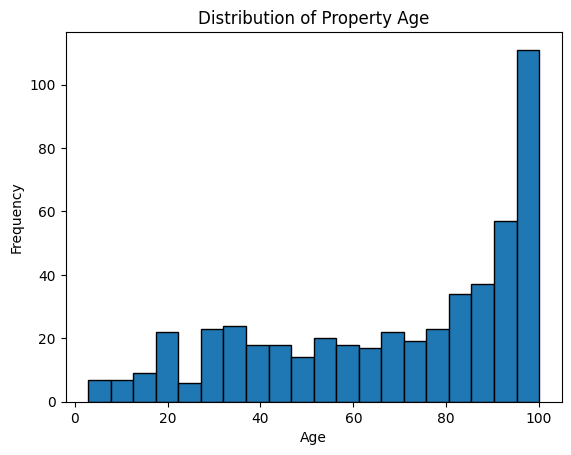

Percentage of properties with chas value of 1: 6.92%


In [ ]:
#Task 4: Data Distribution Analysis


##########################################################


#Histogram of 'Age' column

import matplotlib.pyplot as plt

ages = [row['age'] for row in spark.sql("SELECT age FROM boston_housing").collect()]
plt.hist(ages, bins=20, edgecolor='black')
plt.title('Distribution of Property Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##########################################################

#Percentage of properties with 'chas' value of 1

total_properties = spark.sql("SELECT COUNT(*) AS total FROM boston_housing").collect()[0]['total']
chas_1_properties = spark.sql("SELECT COUNT(*) AS chas_1_total FROM boston_housing WHERE chas = 1").collect()[0]['chas_1_total']
percentage_chas_1 = (chas_1_properties / total_properties) * 100
print(f"Percentage of properties with chas value of 1: {percentage_chas_1:.2f}%")

##########################################################


In [ ]:
#Task 5: Correlation Analysis


##########################################################


#Correlation between "rm" and "medv"

correlation_rm_medv = spark.sql("""SELECT CORR(rm, medv) AS correlation_rm_medv FROM boston_housing""").show()

##########################################################


#Correlation between "ptratio" and "nox"

correlation_ptratio_nox = spark.sql("""SELECT CORR(ptratio, nox) AS correlation_ptratio_nox FROM boston_housing""").show()


##########################################################


+-------------------+
|correlation_rm_medv|
+-------------------+
| 0.6953599470715401|
+-------------------+

+-----------------------+
|correlation_ptratio_nox|
+-----------------------+
|    0.18893267711276893|
+-----------------------+



In [ ]:
#Task 6: Advanced Querying


##########################################################

#Top 5 neighborhoods with the highest median home values ("medv")

spark.sql("""SELECT * FROM boston_housing ORDER BY medv DESC LIMIT 5""").show()

##########################################################


#Average property age for neighborhoods with "chas" value of 1 vs. 0

avg_age_chas_1 = spark.sql("""SELECT AVG(age) AS avg_age_chas_1 FROM boston_housing WHERE chas = 1""").show()

avg_age_chas_0 = spark.sql("""SELECT AVG(age) AS avg_age_chas_0 FROM boston_housing WHERE chas = 0""").show()

##########################################################


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+

+-----------------+
|   avg_age_chas_1|
+-----------------+
|77.50000000000001|
+-----------------+

+-----------------+
|   avg_age_chas_0|
+-----------------+
|67.91167728237794|
+-----------------+



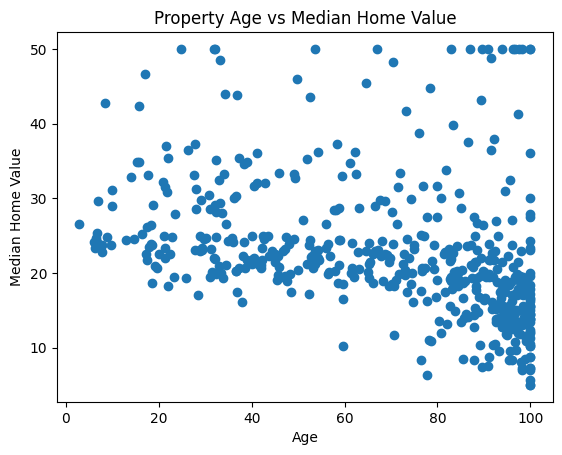

In [ ]:
#Task 7: Visualization


##########################################################

#Create a Hive view named "property_age_view"

spark.sql("""CREATE OR REPLACE TEMP VIEW property_age_view AS SELECT age, medv FROM boston_housing""")


##########################################################

#Plot a scatter plot of property age against median home value

property_age_medv = spark.sql("SELECT age, medv FROM property_age_view").toPandas()

plt.scatter(property_age_medv['age'], property_age_medv['medv'])
plt.title('Property Age vs Median Home Value')
plt.xlabel('Age')
plt.ylabel('Median Home Value')
plt.show()


##########################################################

In [ ]:
#Task 8: Outliers Detection


##########################################################


#Identify properties with a "crim" value greater than 10

spark.sql(""" SELECT * FROM boston_housing WHERE crim > 10 """).show()


+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0